In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
def analyses(filepath):
    files = pd.read_csv(filepath)
    sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=240, h_pos=10, n=9, sep=1, center="dark"), center=0)
    
    gauss_log = sm.GLM(files[['tsnr']],
                       files[['Date', 'SAR', 'AcquisitionTime', 'TxRefAmp']],
                       family=sm.families.Gaussian(sm.families.links.log))
    gauss_log_results = gauss_log.fit()
    print(gauss_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   tsnr   No. Observations:                   88
Model:                            GLM   Df Residuals:                       84
Model Family:                Gaussian   Df Model:                            3
Link Function:                    log   Scale:                          950.11
Method:                          IRLS   Log-Likelihood:                -424.56
Date:                Thu, 07 Feb 2019   Deviance:                       79810.
Time:                        12:25:34   Pearson chi2:                 7.98e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Date             3.172e-07   3.67e-08      8.640      0.000    2.45e-07    3.89e-07
SAR                 0.9239      4.175

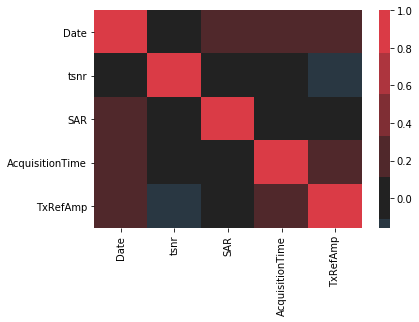

In [3]:
analyses('../data/extractions/BOLD.csv')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   tsnr   No. Observations:                   89
Model:                            GLM   Df Residuals:                       85
Model Family:                Gaussian   Df Model:                            3
Link Function:                    log   Scale:                          548.89
Method:                          IRLS   Log-Likelihood:                -404.99
Date:                Thu, 07 Feb 2019   Deviance:                       46655.
Time:                        12:25:34   Pearson chi2:                 4.67e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Date              3.16e-07   2.58e-08     12.245      0.000    2.65e-07    3.67e-07
SAR                -2.8496      0.693

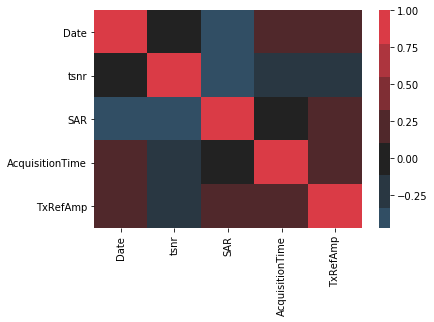

In [4]:
analyses('../data/extractions/BOLD2.csv')

In [5]:
files = pd.read_csv('../data/extractions/BOLD.csv')
df = pd.DataFrame(files,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR'])
df.dtypes

Date                 int64
tsnr               float64
TxRefAmp           float64
AcquisitionTime      int64
SAR                float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
df['Date2'] = df['Date'].map(pd.datetime.toordinal)
df.dtypes

Date               datetime64[ns]
tsnr                      float64
TxRefAmp                  float64
AcquisitionTime             int64
SAR                       float64
Date2                       int64
dtype: object

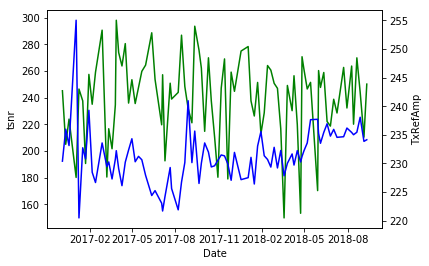

In [7]:
sns.lineplot(x="Date", y="tsnr", data=df, color="g")
ax2 = plt.twinx()
sns.lineplot(x="Date", y="TxRefAmp", data=df, color="b", ax=ax2)

In [11]:
X = df[["Date2", "TxRefAmp", "SAR", "AcquisitionTime"]]
X = sm.add_constant(X)

y = df["tsnr"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tsnr   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6526
Date:                Thu, 07 Feb 2019   Prob (F-statistic):              0.627
Time:                        12:26:39   Log-Likelihood:                -424.41
No. Observations:                  88   AIC:                             858.8
Df Residuals:                      83   BIC:                             871.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1047.2530   1.39e+04     -0.075      0.940   -2.87e+04    2.66e+04
Date2               0.0021      0.019      0.109      0.914      -0.036       0.040
TxRefAmp           -0.9772      0.734     -1.331      0.187      -2.437       0.483
SAR               265.8833   1024.951      0.259      0.796   -1772.703    2304.470
AcquisitionTime    -0.0004      0.001     -0.585      0.560      -0.002       0.001
==============================================================================
Omnibus:                       10.962   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.139
Skew:                          -0.781   Prob(JB):                      0.00381
Kurtosis:                       3.772   Cond. No.                     3.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
prediction = predictions.to_frame()
prediction.columns = ['model']
prediction
df2 = df.join(prediction)

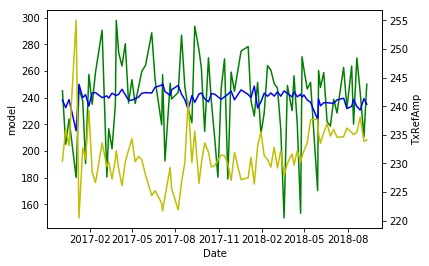

In [13]:
ax = sns.lineplot(x="Date", y="tsnr", data=df2, color="g")
ax_txrefamp = plt.twinx()
sns.lineplot(x="Date", y="model", data=df2, color="b", ax=ax)
sns.lineplot(x="Date", y="TxRefAmp", data=df2, color="y", ax=ax_txrefamp)

# GREEN: TSNR
# BLUE: PREDICTED VALUE
# YELLOW: TxRefAmp